In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/ASUS/Desktop/Use Data for learn ML/Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.isnull().sum().sum()/df.shape[0]*100

24.267100977198698

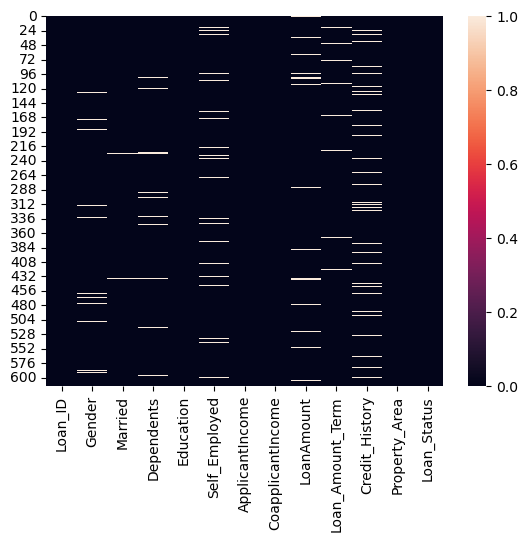

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
# Handle numerical columns missing values

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [11]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df['Credit_History']=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [12]:
df["Credit_History"].unique()

array([1., 0.])

In [13]:
# Handle Categorical missing values

In [14]:
df.select_dtypes(include="object").columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

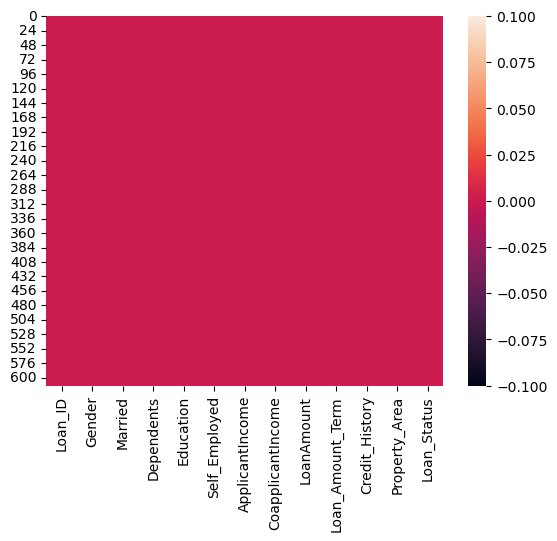

In [17]:
sns.heatmap(df.isnull())

In [18]:
df["Dependents"].replace("3+","3",inplace=True)
df["Dependents"]=df["Dependents"].astype("int64")

In [19]:
# outlier detection

In [20]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,1.009623,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


<Axes: >

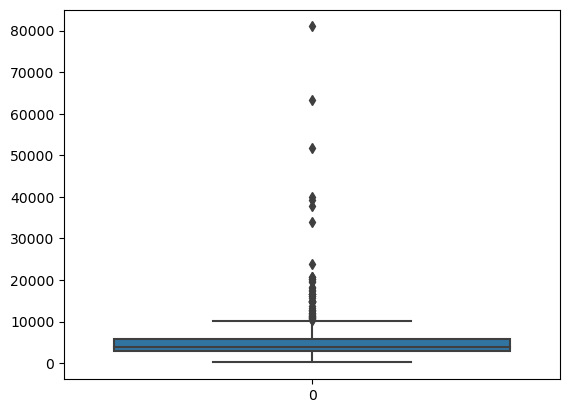

In [21]:
sns.boxplot(df["ApplicantIncome"])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

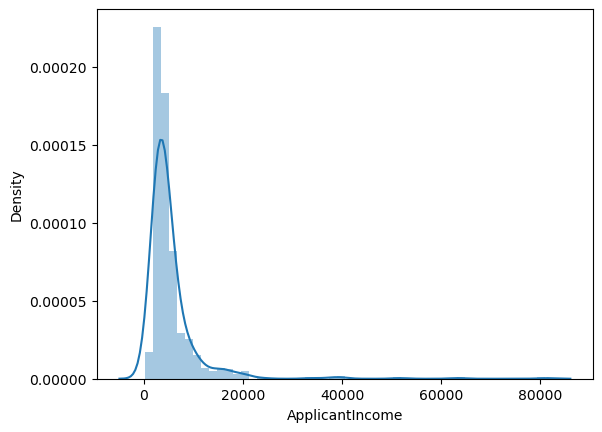

In [22]:
sns.distplot(df["ApplicantIncome"])

In [23]:
q1,q3=df['ApplicantIncome'].quantile([0.25,0.75])
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(-1498.75, 10171.25)

In [24]:
df1=df[df["ApplicantIncome"]<=max_range]

In [25]:
df1.shape

(564, 13)

<Axes: >

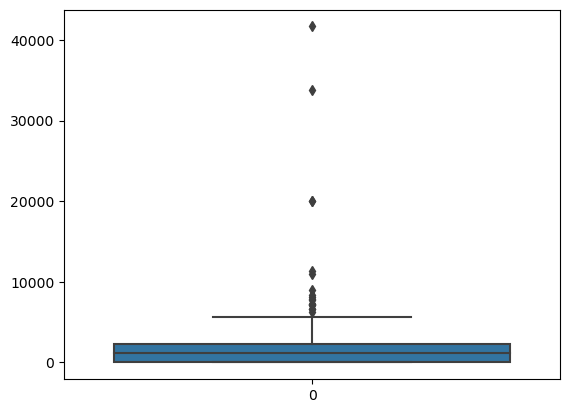

In [26]:
sns.boxplot(df["CoapplicantIncome"])

Text(0.5, 1.0, 'ApplicantIncome distribution after Handle Outler')

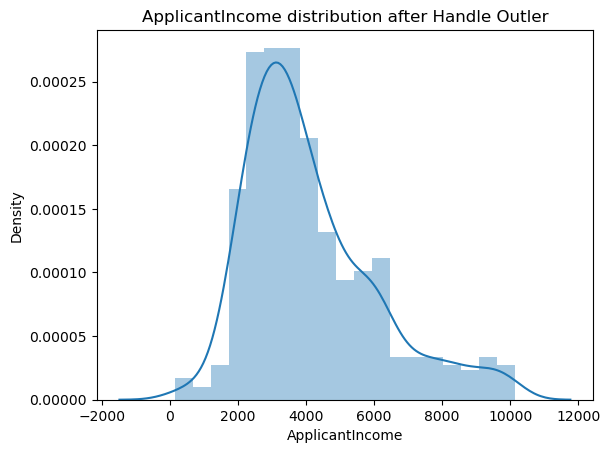

In [27]:
sns.distplot(df1["ApplicantIncome"])
plt.title("ApplicantIncome distribution after Handle Outler")

<Axes: >

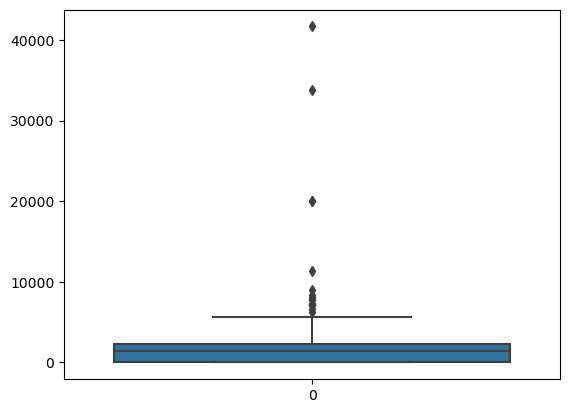

In [28]:
sns.boxplot(df1["CoapplicantIncome"])

In [29]:
q1,q3=df1['CoapplicantIncome'].quantile([0.25,0.75])
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(-3505.5, 5842.5)

In [30]:
df2=df1[df1["CoapplicantIncome"]<=max_range]

<Axes: >

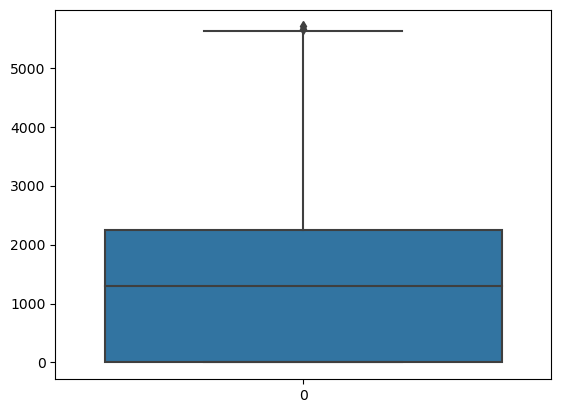

In [31]:
sns.boxplot(df2["CoapplicantIncome"])

<Axes: >

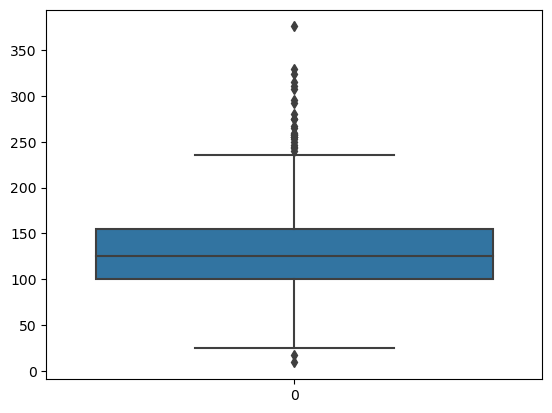

In [32]:
sns.boxplot(df2["LoanAmount"])

In [33]:
q1,q3=df1['LoanAmount'].quantile([0.25,0.75])
IQR=q3-q1
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(13.0, 245.0)

In [34]:
df3=df2[(df2["LoanAmount"]>=min_range) & (df2["LoanAmount"]<=max_range)]

<Axes: >

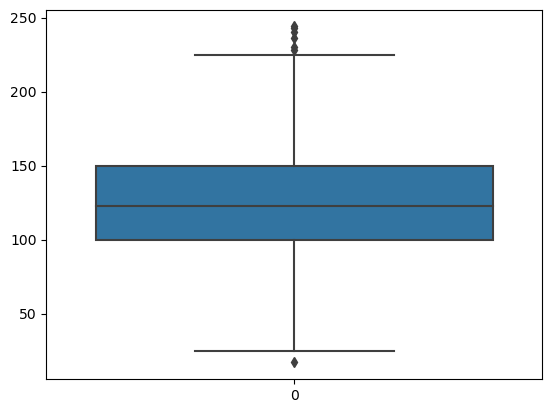

In [35]:
sns.boxplot(df3["LoanAmount"])

In [36]:
df3.shape

(524, 13)

In [37]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [38]:
# perform EDA

In [39]:
gen_count=df3.groupby("Gender")["Gender"].count().reset_index(name="count")
gen_count

,Gender,count
0,Female,98
1,Male,426


Text(0.5, 1.0, 'Gender Count')

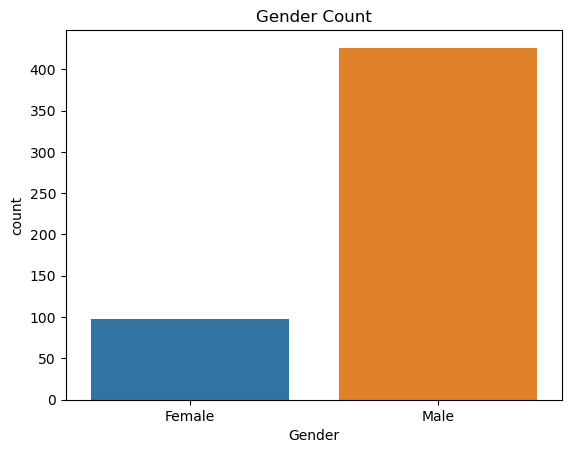

In [40]:
sns.barplot(x=gen_count["Gender"],y=gen_count["count"])
plt.title("Gender Count")

In [41]:
count_dep=df3.groupby("Dependents")["Dependents"].count().reset_index(name="Count")

Text(0.5, 1.0, 'Dependents Count')

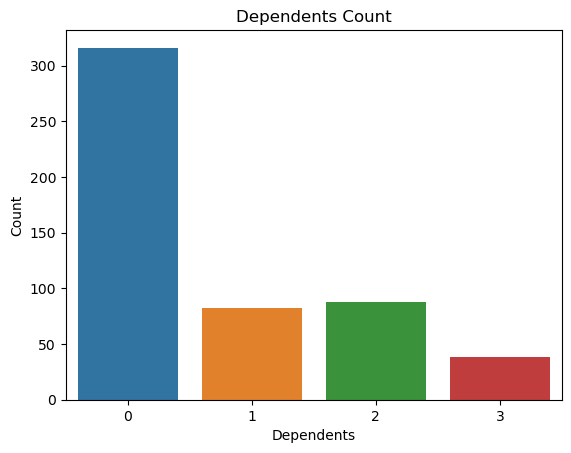

In [42]:
sns.barplot(x=count_dep["Dependents"],y=count_dep["Count"])
plt.title("Dependents Count")

Text(0.5, 1.0, 'Married Count')

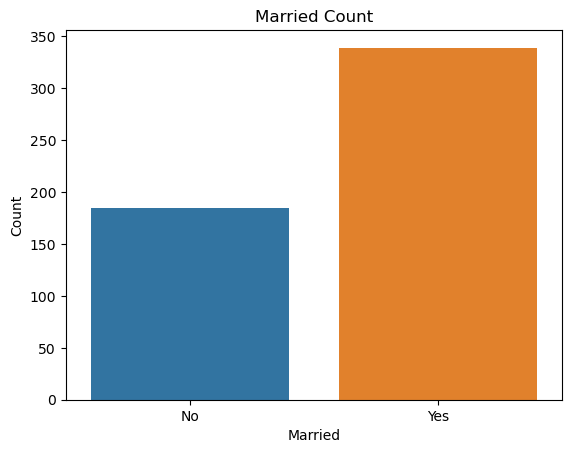

In [43]:
count_mer=df3.groupby("Married")["Married"].count().reset_index(name="Count")
sns.barplot(x=count_mer["Married"],y=count_mer["Count"])
plt.title("Married Count")

Text(0.5, 1.0, 'Education Count')

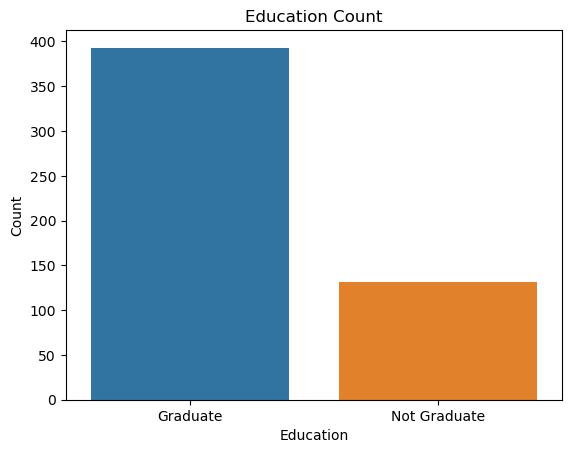

In [44]:
count_edu=df3.groupby("Education")["Education"].count().reset_index(name="Count")
sns.barplot(x=count_edu["Education"],y=count_edu["Count"])
plt.title("Education Count")

Text(0.5, 1.0, 'Self_Employed Count')

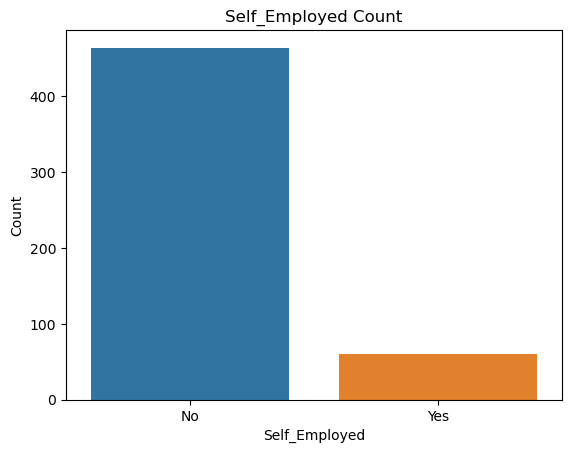

In [45]:
count_s_Emy=df3.groupby("Self_Employed")["Self_Employed"].count().reset_index(name="Count")
sns.barplot(x=count_s_Emy["Self_Employed"],y=count_s_Emy["Count"])
plt.title("Self_Employed Count")

Text(0.5, 1.0, 'Property_Area Count')

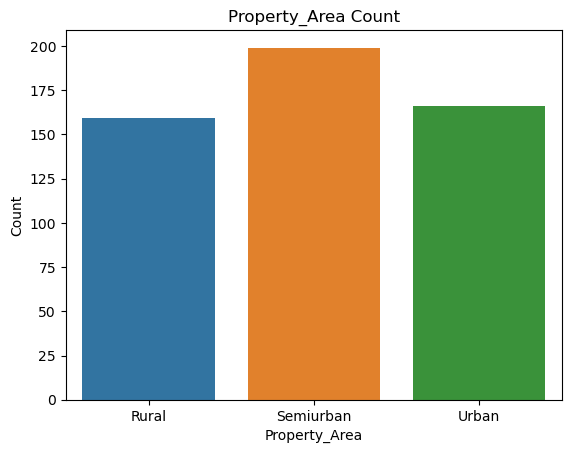

In [46]:
count_p_area=df3.groupby("Property_Area")["Property_Area"].count().reset_index(name="Count")
sns.barplot(x=count_p_area["Property_Area"],y=count_p_area["Count"])
plt.title("Property_Area Count")

Text(0.5, 1.0, 'Loan_Status Count')

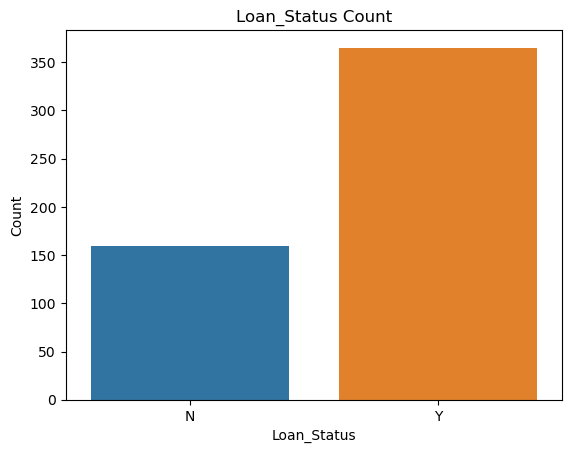

In [47]:
count_Loan_Status=df3.groupby("Loan_Status")["Loan_Status"].count().reset_index(name="Count")
sns.barplot(x=count_Loan_Status["Loan_Status"],y=count_Loan_Status["Count"])
plt.title("Loan_Status Count")

Text(0.5, 1.0, 'Applicant Income Distribution')

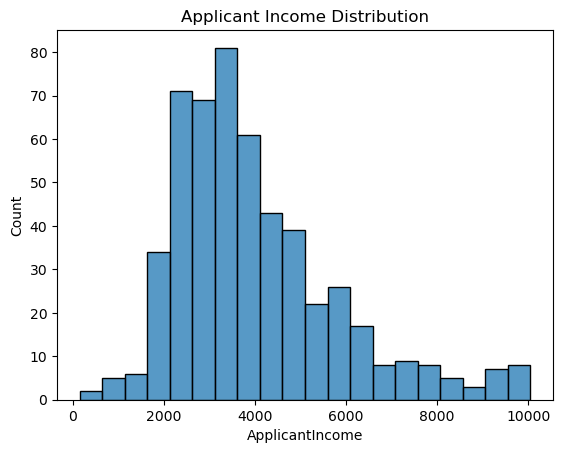

In [48]:
sns.histplot(df3["ApplicantIncome"])
plt.title("Applicant Income Distribution")

In [49]:
# create new attributes

In [50]:
df3["Total_Income"]=df3["ApplicantIncome"]+df3["CoapplicantIncome"]
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [51]:
# Perform Feature scaling

<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

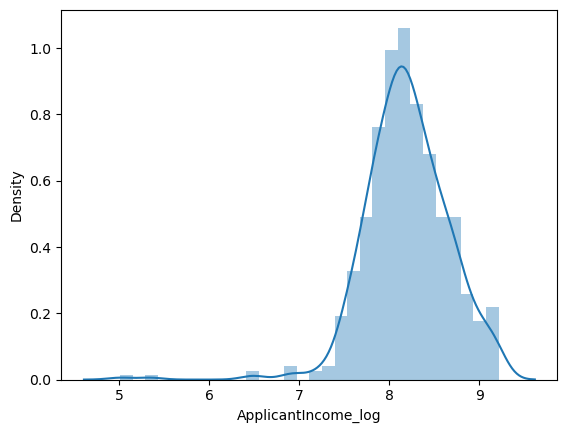

In [52]:
df3["ApplicantIncome_log"]=np.log(df3["ApplicantIncome"])
sns.distplot(df3["ApplicantIncome_log"])

In [53]:
df3["CoapplicantIncome"]=df3["CoapplicantIncome"].astype("int64")

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 613
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              524 non-null    object 
 1   Gender               524 non-null    object 
 2   Married              524 non-null    object 
 3   Dependents           524 non-null    int64  
 4   Education            524 non-null    object 
 5   Self_Employed        524 non-null    object 
 6   ApplicantIncome      524 non-null    int64  
 7   CoapplicantIncome    524 non-null    int64  
 8   LoanAmount           524 non-null    float64
 9   Loan_Amount_Term     524 non-null    float64
 10  Credit_History       524 non-null    float64
 11  Property_Area        524 non-null    object 
 12  Loan_Status          524 non-null    object 
 13  Total_Income         524 non-null    float64
 14  ApplicantIncome_log  524 non-null    float64
dtypes: float64(5), int64(3), object(7)
memor

<Axes: xlabel='CoapplicantIncome_log', ylabel='Density'>

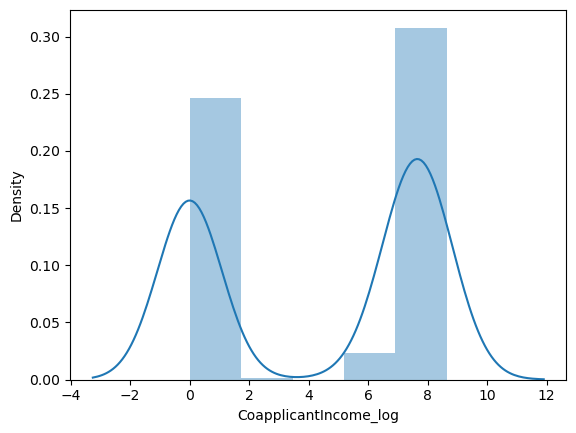

In [55]:
df3["CoapplicantIncome_log"]=np.log1p(df3["CoapplicantIncome"])
sns.distplot(df3["CoapplicantIncome_log"])

<Axes: xlabel='LoanAmount_log', ylabel='Density'>

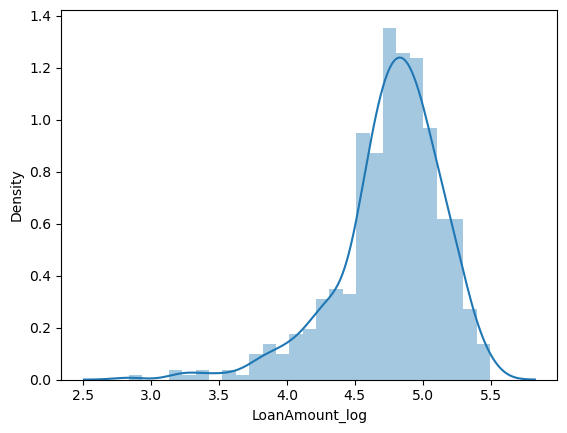

In [56]:
df3["LoanAmount_log"]=np.log(df3["LoanAmount"])
sns.distplot(df3["LoanAmount_log"])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

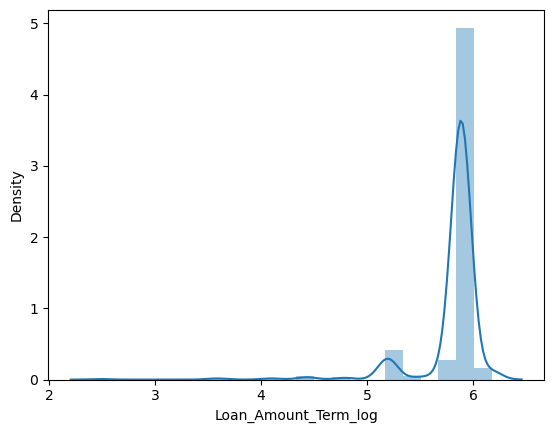

In [57]:
df3["Loan_Amount_Term_log"]=np.log(df3["Loan_Amount_Term"])
sns.distplot(df3["Loan_Amount_Term_log"])

<Axes: xlabel='Credit_History_log', ylabel='Density'>

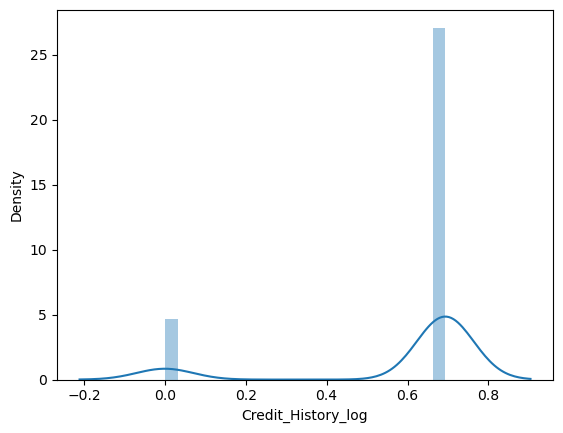

In [58]:
df3["Credit_History_log"]=np.log1p(df3["Credit_History"])
sns.distplot(df3["Credit_History_log"])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

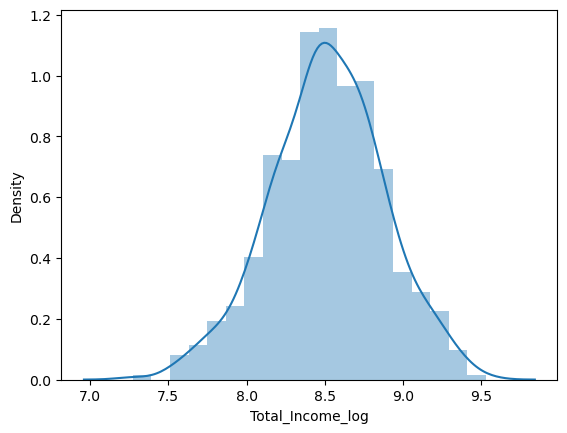

In [59]:
df3["Total_Income_log"]=np.log(df3["Total_Income"])
sns.distplot(df3["Total_Income_log"])

In [60]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Credit_History_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,0.693147,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,0.693147,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,0.693147,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,0.693147,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,0.693147,8.699515


In [61]:
# correlation matrix

<Axes: >

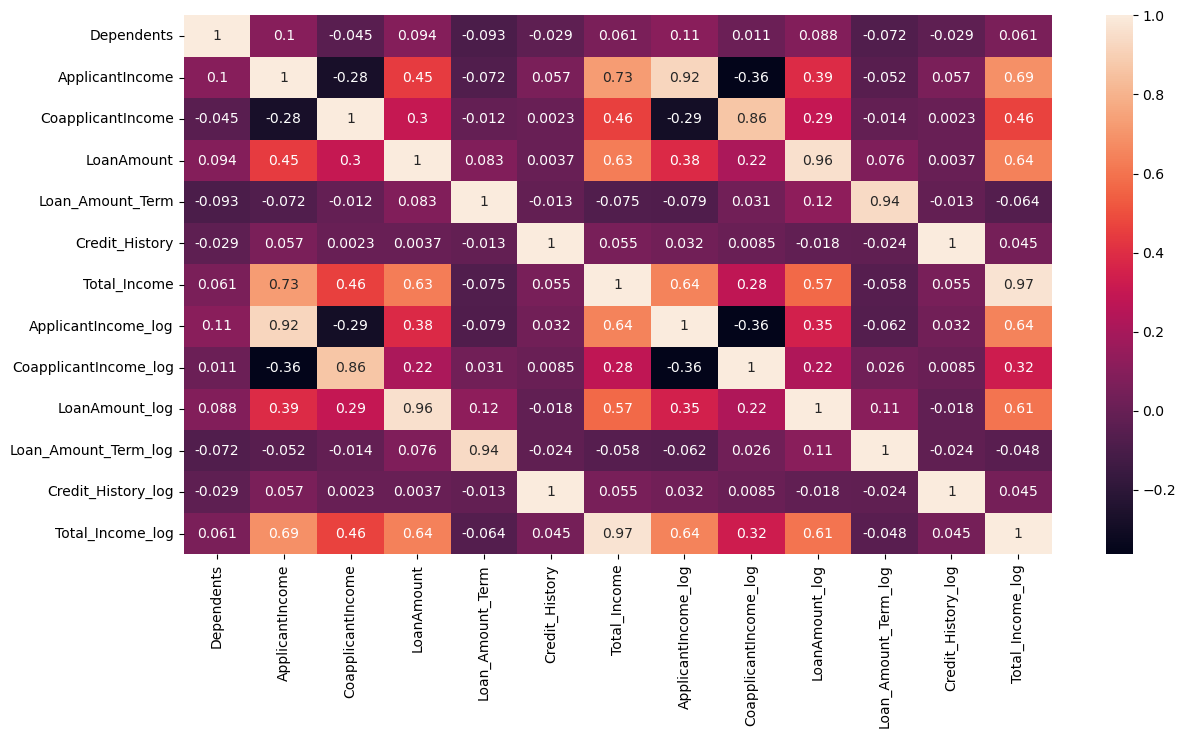

In [62]:
plt.figure(figsize=(14,7))
sns.heatmap(df3.corr(),annot=True)

In [63]:
df3.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncome_log', 'CoapplicantIncome_log',
       'LoanAmount_log', 'Loan_Amount_Term_log', 'Credit_History_log',
       'Total_Income_log'],
      dtype='object')

In [64]:
# Remove Unwanted columns

In [65]:
df3.drop(columns=[
    'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term', 'Total_Income', 'Credit_History', 'CoapplicantIncome_log'
], inplace=True)

In [66]:
# Perform Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
cols=['Gender', 'Married','Education',
       'Self_Employed','Property_Area', 'Loan_Status']
le=LabelEncoder()
for col in cols:
    df3[col]=le.fit_transform(df3[col])

In [69]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Credit_History_log,Total_Income_log
0,1,0,0,0,0,2,1,8.674026,4.986426,5.886104,0.693147,8.674026
1,1,1,1,0,0,0,0,8.430109,4.852030,5.886104,0.693147,8.714568
2,1,1,0,0,1,2,1,8.006368,4.189655,5.886104,0.693147,8.006368
3,1,1,0,1,0,2,1,7.856707,4.787492,5.886104,0.693147,8.505323
4,1,0,0,0,0,2,1,8.699515,4.948760,5.886104,0.693147,8.699515


In [70]:
x=df3.drop(columns=['Loan_Status',"Total_Income_log"],axis=1)
y=df3["Loan_Status"]

In [71]:
# Train_test_split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [74]:
# perform cross-validation

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(LogisticRegression(),x,y,cv=cv)
Lg_score=(p*100).mean()
Lg_score

80.38095238095238

In [78]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(SVC(),x,y,cv=cv)
svc_score=(p*100).mean()
svc_score

66.66666666666667

In [79]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(DecisionTreeClassifier(),x,y,cv=cv)
dt_score=(p*100).mean()
dt_score

72.0

In [80]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(KNeighborsClassifier(),x,y,cv=cv)
knn_score=(p*100).mean()
knn_score

68.95238095238095

In [81]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
p=cross_val_score(RandomForestClassifier(),x,y,cv=cv)
rdf_score=(p*100).mean()
rdf_score

79.23809523809524

In [82]:
compare_score=pd.DataFrame({"Models":["Logistic Regression","Support Vector Classifier","DecisionTreeClassifier",
                                     "KNeighborsClassifier","RandomForestClassifier"],
                            "Score":[Lg_score,svc_score,dt_score,knn_score,rdf_score]})
compare_score

,Models,Score
0,Logistic Regression,80.380952
1,Support Vector Classifier,66.666667
2,DecisionTreeClassifier,72.000000
3,KNeighborsClassifier,68.952381
4,RandomForestClassifier,79.238095


In [83]:
# based on cross- validation random forest is good

In [84]:
# Train model

In [85]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
random_forest.score(x_test,y_test)*100

80.91603053435115

In [87]:
random_forest.score(x_train,y_train)*100

100.0

In [88]:
# In this model is overfitting

In [89]:
# Hyperperameter tuning

In [90]:
random_f=(RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1,))
random_f.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features=1, min_samples_split=25)

In [91]:
random_f.score(x_train,y_train)*100

83.96946564885496

In [92]:
random_f.score(x_test,y_test)*100

81.67938931297711

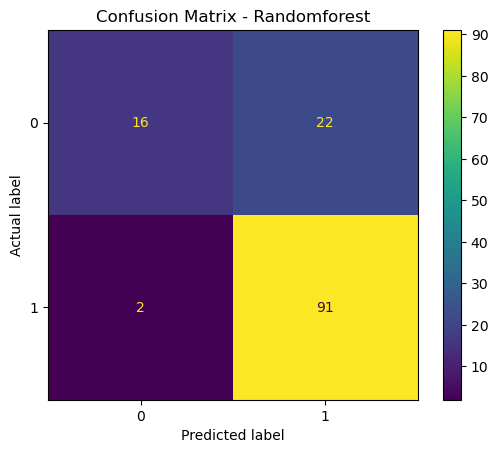

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score

y_pred = random_f.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_f.classes_)
disp.plot()
plt.title("Confusion Matrix - Randomforest")
plt.ylabel("Actual label")
plt.show()

In [94]:
accuracy_score(y_test,random_f.predict(x_test))*100

81.67938931297711

In [95]:
precision_score(y_test,random_f.predict(x_test))*100

80.53097345132744

In [96]:
recall_score(y_test,random_f.predict(x_test))*100

97.84946236559139

In [97]:
f1_score(y_test,random_f.predict(x_test))*100

88.3495145631068

In [98]:
df3.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status', 'ApplicantIncome_log', 'LoanAmount_log',
       'Loan_Amount_Term_log', 'Credit_History_log', 'Total_Income_log'],
      dtype='object')

In [99]:
# predict output on unseen data

In [100]:
random_f.predict(x_test)

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
y_test.values

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
random_f.predict([[1,0,0,0,0,2,8.674026,4.986426,5.886104,0.693147]])

array([1])

In [103]:
# values convert in human input

In [104]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [105]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Credit_History_log,Total_Income_log
0,1,0,0,0,0,2,1,8.674026,4.986426,5.886104,0.693147,8.674026
1,1,1,1,0,0,0,0,8.430109,4.852030,5.886104,0.693147,8.714568
2,1,1,0,0,1,2,1,8.006368,4.189655,5.886104,0.693147,8.006368
3,1,1,0,1,0,2,1,7.856707,4.787492,5.886104,0.693147,8.505323
4,1,0,0,0,0,2,1,8.699515,4.948760,5.886104,0.693147,8.699515


In [106]:
import numpy as np
import pandas as pd

def predict_loan_status(Gender, Married, Dependents, Education, Self_Employed,
                        Property_Area, ApplicantIncome, LoanAmount,
                        Loan_Amount_Term, Credit_History):

    # Manual encoding based on what was used during training
    gender_map = {'Male': 1, 'Female': 0}
    married_map = {'Yes': 1, 'No': 0}
    dependents_map = {'0': 0, '1': 1, '2': 2,"3" : 3}
    education_map = {'Graduate': 0, 'Not Graduate': 1}
    self_employed_map = {'Yes': 1, 'No': 0}
    property_area_map = {'Urban': 2, 'Semiurban': 1, 'Rural': 0}

    # Apply mappings
    gender = gender_map.get(Gender, 0)
    married = married_map.get(Married, 0)
    dependents = dependents_map.get(Dependents, 0)
    education = education_map.get(Education, 1)
    self_employed = self_employed_map.get(Self_Employed, 0)
    property_area = property_area_map.get(Property_Area, 1)

    # Log-transform numerical values
    ApplicantIncome_log = np.log(ApplicantIncome + 1)
    LoanAmount_log = np.log(LoanAmount + 1)
    Loan_Amount_Term_log = np.log(Loan_Amount_Term + 1)
    Credit_History_log = np.log(Credit_History + 1) if Credit_History > 0 else 0

    # Prepare input DataFrame
    input_df = pd.DataFrame([{
        'Gender': gender,
        'Married': married,
        'Dependents': dependents,
        'Education': education,
        'Self_Employed': self_employed,
        'Property_Area': property_area,
        'ApplicantIncome_log': ApplicantIncome_log,
        'LoanAmount_log': LoanAmount_log,
        'Loan_Amount_Term_log': Loan_Amount_Term_log,
        'Credit_History_log': Credit_History_log,
    }])

    # Predict using your trained model
    prediction = random_f.predict(input_df)
    return prediction[0]


In [107]:
# predict output

In [108]:
predict_loan_status(
    Gender='Female',
    Married='No',
    Dependents='0',
    Education='Graduate',
    Self_Employed='Yes',
    Property_Area='Semiurban',
    ApplicantIncome=4583,
    LoanAmount=133.000000,
    Loan_Amount_Term=360.0,
    Credit_History=0.0
)


0

In [109]:
import pickle
with open("Loan eligibility predication model","wb") as f:
    pickle.dump(random_f,f)

In [110]:
import json
columns={
    "data_columns" :[col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [111]:
! pip install flask

Defaulting to user installation because normal site-packages is not writeable
